In [1]:
import numpy as np
from scipy import stats as scs
from matplotlib import pyplot as plt

# Bagging and Random Forests

## Objectives

TODO TODO

## Ensemble methods

Combining multiple different models into a single model is called **ensembling**. Though ensemble method can be complicated, the most basic ensemble methods are very simple.

### Example: guessing jellybeans.

Imagine a contest to guess the number of jellybeans in a 5-gallon jar. Three people make guesses:

* A: 8246
* B: 8094
* C: 7200

Imagine that the true value is 7715 jelly beans. In this case, B is closest at 379 off, and would win. However, before the contest is over, A and C decide to team up; they will average their scores, and split the jelly beans if they win. Their average score is only 16 off; they win and split the difference.

Were A and C clever, or did they get lucky?

If we assume that each contestant's guess is a normal distribution with $\mu = n_{beans}$ and the same unknown variance $\sigma^2$, then the distribution of the result of averaging the guesses of $n_{ensembler}$ contestants is

$$X = \mathcal{N}(n_{beans}, \frac{\sigma^2}{n_{ensembler}})$$

In other words if the ensembled estimators are unbiased ((DEFINE; excuse the huge assumption)), then an ensemble can contrain its expected error to an arbitrarily small value with an arbitrarily large number of ensembled models. 

(I'll leave it as an exercise to the student whether the _expected value_ of the winnings for an ensemble contestant beats a lone contestant. Hint hint: the closed form solution is very challenging, but simulating it is pretty straightforward).

### Example: fallable voters

Another contest: you have to guess whether a leader will do a good job. Each person, when asked about whether someone is a good leader or not, is only right 55% of the time.

Let's assume that the candidate leader is qualified, and then take votes at a 55% rate of correctness.

In [2]:
np.random.seed(560)

In [3]:
n = 1000
votes = scs.bernoulli(p=0.55).rvs(n)*2 - 1

Let's take a look at some votes:

In [4]:
votes[0:100]

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1])

We can make a plot to look at more of them at once:

[Text(0, 0, 'incorrect vote'), Text(0, 0, 'correct vote')]

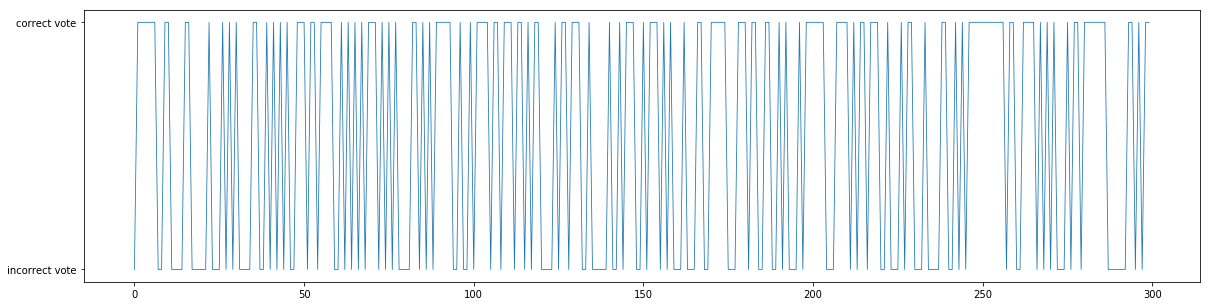

In [5]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(votes[0:300], lw=0.8)
ax.set_yticks([-1, 1])
ax.set_yticklabels(["incorrect vote", "correct vote"])

We can take a tally of votes and keep the running tally on the x-axis:

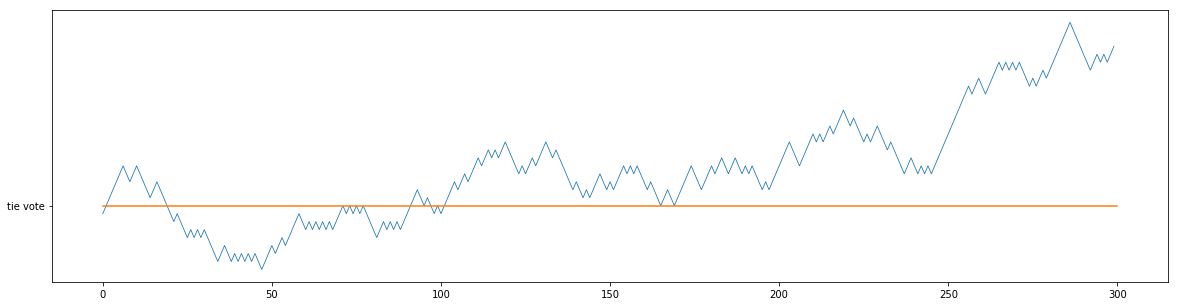

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.cumsum(votes[0:300]), lw=0.8)
ax.set_yticks([0])
ax.set_yticklabels(["tie vote"])
#PUT A LEGEND IN HERE
ax.plot((0,300),(0,0))

In this case, for nearly the first 100 votes, the incorrect votes were winning. Eventually the correct votes took over. Maybe we just got lucky though? Let's repeat this experiment a large number of times and see the fraction of time the vote has the correct outcome:

Text(0.5, 1.0, 'Running tally for 280 revotes')

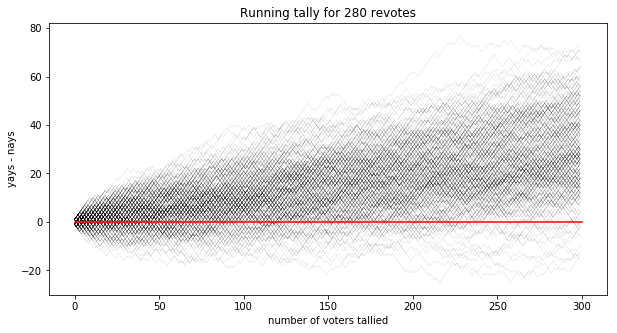

In [7]:
n_revotes = 280
n_estimators = 300

fig, ax = plt.subplots(figsize=(10,5))
totals = []
for i in range(n_revotes):
    votes = scs.bernoulli(p=0.55).rvs(n_estimators)*2 - 1
    totals.append( votes.sum() )
    ax.plot( votes.cumsum(), lw=0.2, c="black", alpha=0.3 )
    
ax.plot((0,n_estimators),(0,0), c="red")
ax.set_ylabel("yays - nays")
ax.set_xlabel("number of voters tallied")
ax.set_title(f"Running tally for {n_revotes} revotes")

If we take a slice along the y axis at 300 votes and visualize it as a histogram, we see a familiar bell curve:

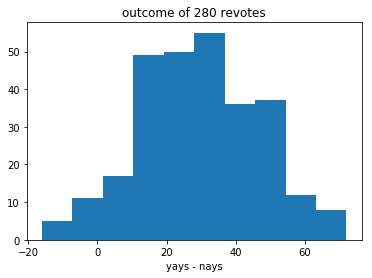

In [8]:
fig, ax = plt.subplots()
ax.hist( totals, bins=10 )
ax.set_title(f"outcome of {n_revotes} revotes")
ax.set_xlabel("yays - nays")
None

With 300 voters, we're still wrong some of the time.

In [9]:
f"{100*(np.array(totals)<0).sum() / len(totals)}% of the time"

'4.642857142857143% of the time'

Not bad, but we can do better by tallying _more_ voters.

Text(0.5, 1.0, 'Fraction of revotes with correct outcome')

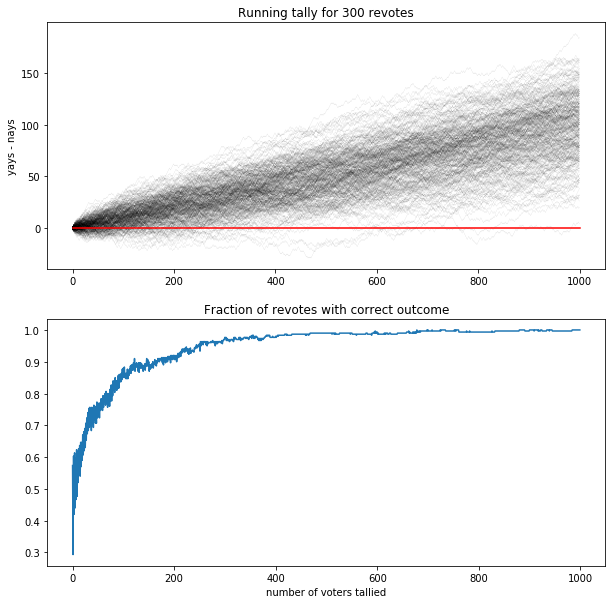

In [10]:
n_revotes = 300
n_voters = 1000

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
totals = []
tallies = []
for i in range(n_revotes):
    revote = scs.bernoulli(p=0.55).rvs(n_voters)*2 - 1
    totals.append( votes.sum() )
    tally = revote.cumsum()
    axs[0].plot( tally, lw=0.2, c="black", alpha=0.2 )
    tallies.append(tally)
    
axs[0].plot((0,n_voters),(0,0), c="red")
axs[0].set_ylabel("yays - nays")
axs[1].set_xlabel("number of voters tallied")
axs[0].set_title(f"Running tally for {n_revotes} revotes")

tallies = np.array(tallies)
axs[1].plot( (tallies>0).sum(axis=0)/n_revotes )
axs[1].set_title("Fraction of revotes with correct outcome")

This is another situation where an arbitrarily large ensemble of error-prone estimators can achieve an error with an arbitarily small bound.

## Bias and Variance

Question: what is bias?

Question: what is variance?

Question: what is the bias of an unpruned decision tree?

## The goal of ensembling

Qualitatively: the goal of ensembling is to produce better models. This is often formalized in two ways:
* Reduce variance
 * Jellybean example - each estimator had no bias (ie, on average is right), but high variance, which we could reduce by averaging.
 * **Jumping ahead** - random forests.
* Reduce bias
 * Leader-selection example - each component model ("voter") could have high bias (ie, is repeatably wrong), but the ensemble has low bias (is repeatably correct across resampled training sets).
 * **Jumping ahead** - boosted trees.




## Review: Bootstrapping

What is a bootstrap sample?

What have we learned that bootstrap samples are good for so far?

We have some data:

In [11]:
np.random.seed(42)
data = scs.uniform(0,10).rvs(100)

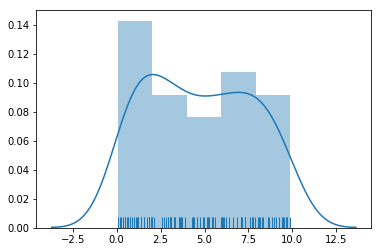

In [12]:
import seaborn as sns
sns.distplot(data, rug=True)

We might be curious about the median of the population. Because we are the gods of this small universe, we happen to know - it's 5.0.

But generally, population statistics are known only to Nature, and hidden forever from us. The best we can do is estimate from a sample:

In [13]:
np.median( data )

4.6414245468949265

This point estimate is overconfident - we don't really know the median. Bootstrapping is good for this.

In [14]:
def bootstrap_confidence_interval(data, function, alpha=0.05, n_bootstraps=1000):
    '''return a the confidence interval for a function of data using bootstrapping'''
    statistics = []
    for _ in range(n_bootstraps):
        boot_ind = np.random.choice(range(len(data)), 
                                    size=len(data),
                                    replace=True)
        bootstrap_sample = data[boot_ind]
        statistics.append(function(bootstrap_sample))
    return (np.percentile(statistics, 100*(alpha/2.)),
            np.percentile(statistics, 100*(1-alpha/2.)), statistics)

Text(0.5, 1.0, 'distribution of bootstrap medians')

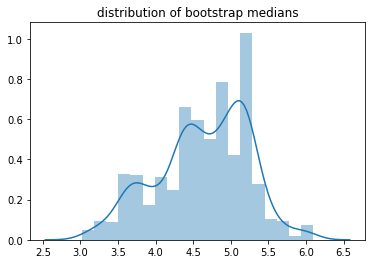

In [15]:
alpha = 0.05
low, high, statistics = bootstrap_confidence_interval( data, np.median, alpha=alpha )

fig, ax = plt.subplots()
sns.distplot( statistics, ax=ax )
ax.set_title("distribution of bootstrap medians")

In [16]:
print("The {}% confidence interval is from {:.3} to {:.3}".format(1-alpha, low, high))

The 0.95% confidence interval is from 3.44 to 5.7


To confirm this worked, let's do it a bunch of times.

In [17]:
hits = []
for _ in range(100):
    data = scs.uniform(0,10).rvs(100)
    ci = bootstrap_confidence_interval(data, np.median)
    hits.append(ci[0] < 5.0 and ci[1] > 5.0)
print(np.mean(hits))

0.94


We said we'd be wrong 5% of the time, and we were wrong about 5% of the time.

## Bootstrapped aggregation

 * We are thinking about the population of all possible decision tree models on our data.
 * If I take $n$ samples *iid* from this distribution and average them the variance goes down by $\sqrt n$
 * There is some correlation between models because they are all trained on bootstrap samples from the same draw.
 
## An Experiment

You're each going to be a decision tree on some data based on a bootstrap sample, and then we'll all ensemble the results.

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_iris()

# Split into test/train, using the same random state for everyone
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    random_state=462)

clf = DecisionTreeClassifier()

# each of you has a different bootstrap sample
indices = np.arange(len(X_train))
bootstrap_sample_indices = np.random.choice(indices, len(X_train))

clf.fit(X_train[bootstrap_sample_indices], 
        y_train[bootstrap_sample_indices])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
print("Accuracy = {:.3f}".format(np.mean(clf.predict(X_test) == y_test)))

Accuracy = 0.789


In [20]:
print("My prediction: {}".format(clf.predict(X_test)[0:20]))
print("Actual result: {}".format(y_test[0:20]))

My prediction: [0 2 0 1 1 2 2 2 0 2 2 0 1 2 1 1 1 2 1 0]
Actual result: [0 2 0 1 2 1 2 2 0 2 2 0 1 2 2 2 1 2 1 0]


What is your prediction?

This concept, creating each model from a *bootstrap* sample and *aggregating* the results, is called **bagging**. It can be used with any sort of model, but is generally done with decision trees.

Question: why?

### Bootstrapping on Regression Trees

Let's do another example. Consider some points.

In [21]:
n_data = 5000
x = scs.uniform(0, 10).rvs(n_data)
y = np.sin(x) + scs.norm(0, 0.5).rvs(n_data)

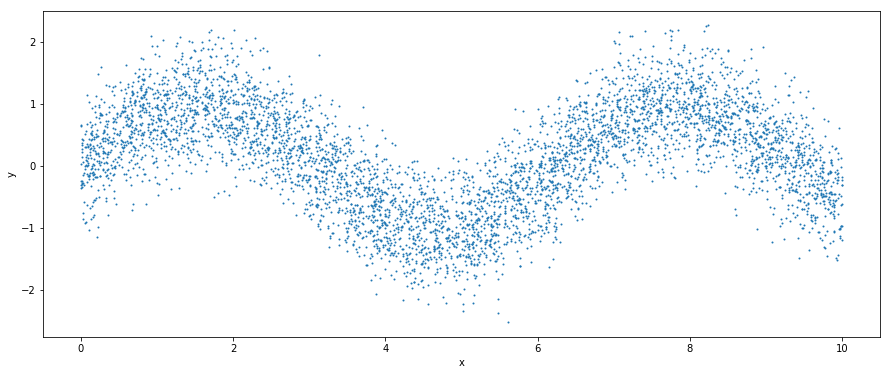

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)
ax.set_xlabel('x')
ax.set_ylabel('y');

We'll create a decision tree to predict the points. We won't make it that deep because we want to visualize the prediction.

In [23]:
from sklearn.tree import DecisionTreeRegressor

max_depth = 10
model0 = DecisionTreeRegressor(max_depth=max_depth)
model0.fit(x.reshape(-1, 1), y)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

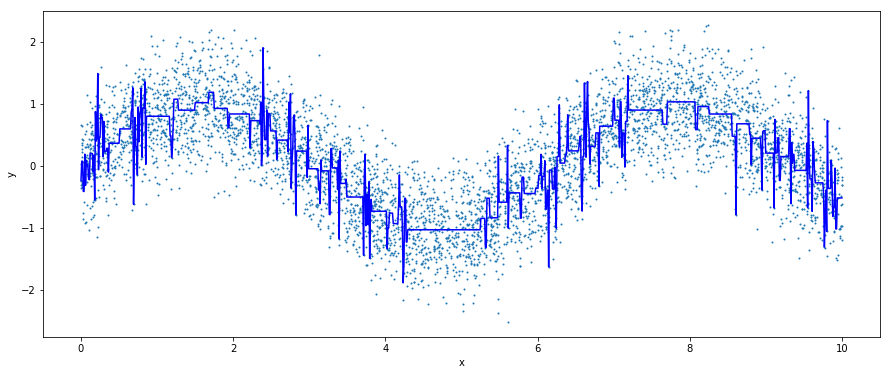

In [24]:
n_pts = 1000
xpts = np.linspace(0, 10, n_pts)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

ax.plot(xpts, model0.predict(xpts.reshape(-1, 1)), 'b')
ax.set_xlabel('x')
ax.set_ylabel('y');

That's what one decision tree looks like; each discontinuity is a node split. What if we create a bunch of bootstrap samples and build an ensemble of trees from them?

In [25]:
n_bootstraps = 5000
yptses = np.zeros((n_bootstraps, n_pts))
for i in range(n_bootstraps):
    bootstrap_ind = np.random.choice(np.arange(n_data), n_data, replace=True)
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x[bootstrap_ind].reshape(-1, 1), y[bootstrap_ind])
    yptses[i] = model.predict(xpts.reshape(-1, 1))

Here are three of the bootstrapped trees:

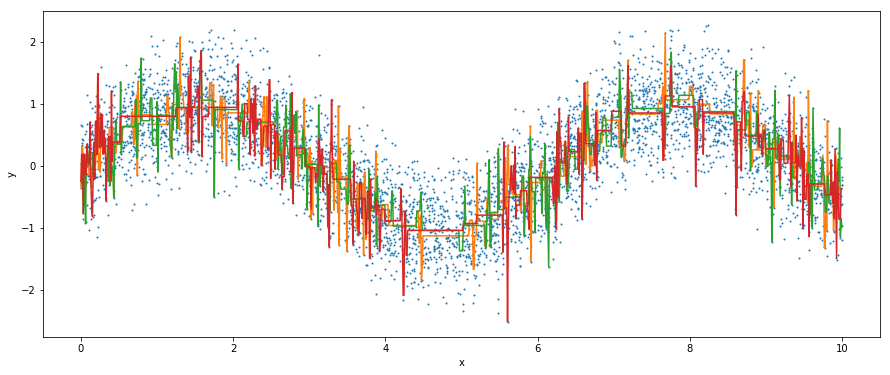

In [26]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

for i in range(3):
    ax.plot(xpts, yptses[i])
    
ax.set_xlabel('x')
ax.set_ylabel('y');

And here in black is the average across all bootstrapped trees:

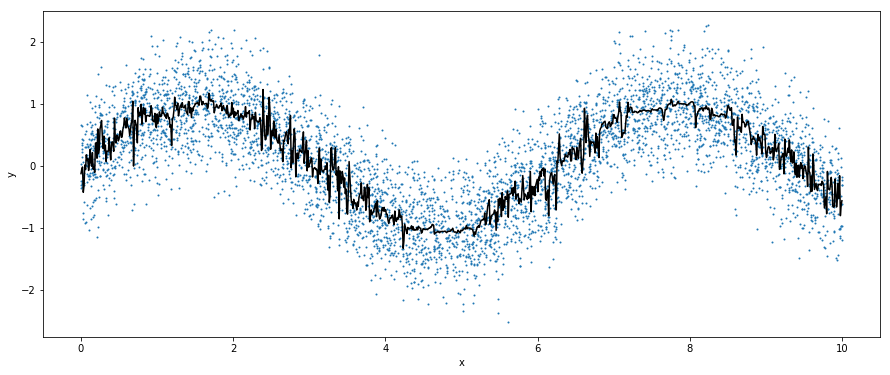

In [27]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, y, '.', ms=2)

ax.plot(xpts, yptses.mean(axis=0), 'k')
ax.set_xlabel('x')
ax.set_ylabel('y');

## Random Forests

Bagging decision trees is pretty cool, but the trees still tend to look pretty similar. We want a way to make the trees more different (decorrelate them) without substantially increasing the bias of each tree.

Random forests do this with **feature subsetting** (also called "subspace sampling"). For any node in any tree, instead of finding the best split among **all** features, we randomly select a few features, and find the best split among just those features. The number of features $m$ to consider at each split is a hyperparameter; typically $m = \sqrt k$ is used.

Again, the features to consider are chosen **at each split**, not each tree. **Everyone gets this wrong.**

For example, suppose we're building a model with nine features. One of them is really predictive, another is pretty good, and the others are just ok.

If we build an ensemble of bagged trees, probably each will use the good feature as the first split, and probably each will use the pretty-good feature at the next split. For the other splits the trees might differ, particularly farther down when only a few points are being considered, but the first branches will be pretty much the same (even though the trees are getting slightly different sets of data).

If we build a tree in a random forest, that first split will only consider three (random) features. Only a fraction of the trees (around 30%) will consider the "good" feature on the first split, so they will use that. Some of the others will consider the "pretty-good" feature, so they will start there. The others will start at some other feature. Those trees will still consider the good and pretty-good features at some of the lower nodes (randomly), and will get to take advantage of them, but the overall structure of those trees will be very different.

## Random Forest Parameters

Random Forest Parameters

 * Total number of trees
 * Number of features to use at each split
 * Individual decision tree Parameters
    - e.g., tree depth, pruning, split criterion

In general, RF are fairly robust to the choice of parameters and overfitting.

## Pros and Cons of Random Forest

Pros

 * Often give near state-of-the-art performance
 * Good out-of-the-box performance
 * No feature scaling needed
 * Model nonlinear relationships

Cons

 * Can be expensive to train (though can be done in parallel)
 * Requires some work to interpret the effect of a single feature / feature interaction on the target

## Performance

Let's investigate how well a random forest performs compared with a single decision tree using the breast cancer dataset. 

In [28]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# dropping these very informative features to illustrate
#  the performance difference between RF and a single tree
X = X.drop(['worst concave points', 'mean concave points', 
            'worst perimeter', 'worst radius', 
            'worst area', 'mean concavity'], axis=1)

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0)


In [29]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [30]:
y_train[:10]

56     0
144    1
60     1
6      0
8      0
474    1
320    1
252    0
202    0
246    1
dtype: int64

In [31]:
y_train.mean()

0.6194225721784777

In [32]:
from sklearn.model_selection import GridSearchCV


# Parameter Search                                     
model = DecisionTreeClassifier()
depth_param = np.arange(1, 12, 1)
num_samples_param = np.arange(5,95,10)
parameters = {'max_depth' : depth_param,
             'min_samples_leaf' : num_samples_param}
clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)
print('Accuracy score: {:.3}'.format(clf.score(X_test, y_test)))

Accuracy score: 0.894


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
clf.best_params_

{'max_depth': 2, 'min_samples_leaf': 5}

Now random forests.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

Accuracy score: 0.952


So that's better.

# Interpreting Random Forests

## Out-Of-Bag Error

The out-of-bag error is a way to measure the error of a bagged model (including random forests).

Since the decision trees are constructed from a bootstrapped sample, each tree will (probably) not see all of the data, so each data point will (probably) not be seen by many of the trees.

Let's imagine a data set with 10 points, and that we're making a random forest with 20 trees. We'll then construct 20 bootstrap samples.

In [36]:
fake_data = np.random.random(10)

n_data = len(fake_data)
n_trees = 20

np.random.seed(42)

bootstrap_indices = np.random.choice(n_data,
                                     [n_trees, n_data],
                                     replace=True)
# sort along rows to make it a bit easier to read
bootstrap_indices.sort(axis=1)
bootstrap_indices

array([[2, 3, 4, 4, 6, 6, 6, 7, 7, 9],
       [1, 1, 2, 3, 4, 5, 5, 7, 7, 7],
       [0, 0, 2, 3, 4, 5, 6, 8, 9, 9],
       [1, 2, 2, 3, 4, 4, 6, 6, 8, 8],
       [1, 1, 3, 4, 6, 7, 8, 8, 9, 9],
       [0, 1, 1, 2, 3, 3, 5, 5, 7, 9],
       [1, 1, 3, 3, 5, 6, 7, 8, 9, 9],
       [0, 1, 4, 4, 7, 7, 8, 8, 8, 9],
       [0, 0, 2, 2, 6, 7, 7, 7, 7, 8],
       [0, 2, 4, 6, 6, 7, 8, 8, 9, 9],
       [0, 1, 2, 2, 4, 5, 6, 6, 7, 7],
       [0, 0, 2, 2, 4, 4, 6, 6, 8, 9],
       [0, 2, 3, 3, 4, 6, 6, 6, 9, 9],
       [1, 2, 3, 3, 4, 5, 5, 6, 8, 9],
       [0, 0, 3, 6, 6, 8, 8, 8, 8, 9],
       [0, 2, 2, 4, 5, 6, 7, 7, 8, 9],
       [0, 0, 1, 3, 3, 5, 6, 7, 8, 9],
       [0, 0, 0, 0, 1, 1, 2, 4, 5, 7],
       [0, 0, 1, 2, 4, 4, 5, 6, 6, 9],
       [0, 1, 3, 3, 4, 5, 5, 6, 7, 7]])

We would then construct 20 trees, each using the data in one of the rows.

Notice the first tree (and several others) isn't constructed using point 0 at all. So we could test that point on an ensemble of just those particular trees to get an independent measure of the effectiveness of the model. Similarly, we could test other points on other trees.

Question: which trees would we use to test point 1?

In [37]:
bootstrap_indices[(bootstrap_indices != 1).all(axis=1), :]

array([[2, 3, 4, 4, 6, 6, 6, 7, 7, 9],
       [0, 0, 2, 3, 4, 5, 6, 8, 9, 9],
       [0, 0, 2, 2, 6, 7, 7, 7, 7, 8],
       [0, 2, 4, 6, 6, 7, 8, 8, 9, 9],
       [0, 0, 2, 2, 4, 4, 6, 6, 8, 9],
       [0, 2, 3, 3, 4, 6, 6, 6, 9, 9],
       [0, 0, 3, 6, 6, 8, 8, 8, 8, 9],
       [0, 2, 2, 4, 5, 6, 7, 7, 8, 9]])

On average, how many trees can we use to test each point?

In [38]:
bsize = []
for i in range(10):
    bsize.append(sum((bootstrap_indices != i).all(axis=1)))

In [39]:
np.mean(bsize)/n_trees

0.335

It turns out this number is $\frac{1}{e}$; you can [read about the math](https://stats.stackexchange.com/questions/88980/why-on-average-does-each-bootstrap-sample-contain-roughly-two-thirds-of-observat) and, relatedly, [derangements](https://en.wikipedia.org/wiki/Derangement)

The **out of bag (OOB) error** for a single tree is the error on the unseen data points. The OOB error for the forest is the average OOB error of the trees. 


OOB error gives an estimate of the generalization error of our model, but often we use cross validation anyway because we're comparing with other models and we want to use the same validation pipeline for everything.

## Feature Importances

One of the challenges of random forests is the difficulty of interpretability. *Feature importances* are a measure of (roughly) which features made the most effective decisions across the trees.

This can be a critical business question. For example, with churn analysis, it's generally more important to understand *why* customers are churning than to predict which customers are going to churn.

How should we measure it?

## Feature Importances: Average Decrease in Impurity

How much does each feature decrease the impurity (that is, how much does each feature contribute to information gain, on average)? (Described [here](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#giniimp))

 * For each tree, each split is made in order to reduce the total impurity of the tree (Gini/entropy/MSE). 
 * "Total information gain" for a single tree is the sum of the information gain at each split, and a feature's importance for a single tree is the total information gain of splits involving that feature divided by the total information gain of the tree.
 * This is called **Gini importance** and it is how `sklearn` calculates feature importance. 
 * The importance of a feature in a forest is the average of the Gini importances for that feature across all trees. 

In [40]:
# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0)

In [41]:
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0,
                           oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [60]:
rf.oob_score_

0.9553805774278216

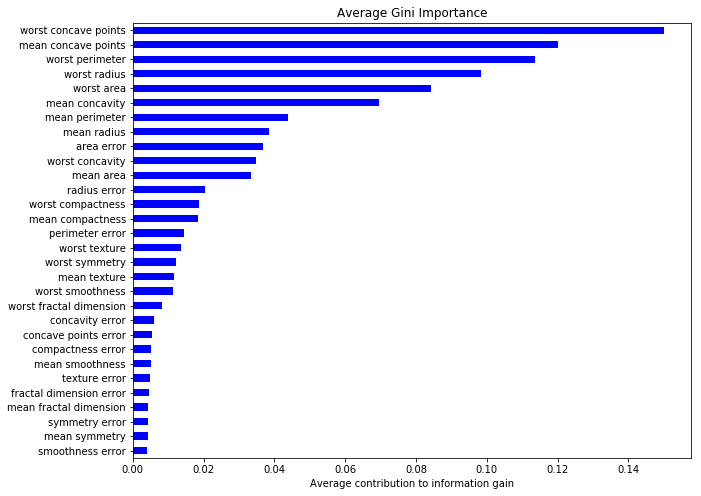

In [61]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_,
                           index=X.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');

## Feature Importances: Average Decrease in test (OOB) score when a feature's values are shuffled

(Described [here](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#varimp))

How much does randomly shuffling the values of a feature affect performance (say, accuracy score)?

To compute the importance of the $j^{th}$ feature:

 * When the $b^{th}$ tree is grown, use it to predict the OOB samples and record the score (accuracy, for example).
 * Scramble the values of the $j^{th}$ feature in the OOB samples and do the prediction again.  Compute the new (lower) score.
 * Average the decrease in score across all trees.

Here we have to roll our own random forest since `sklearn`s `RandomForest` class doesn't give us easy access to the OOB sample indices. See the code in `importance_and_dependence.py`.

In [62]:
# Load data
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0)

In [65]:
# my own implementation of partial dependence and
# permutation importance. 
# OOB permutation importance required me to write 
# my own Random Forest class as well
from importance_and_dependence import (MyRandomForestClassifier,
                                       MyRandomForestRegressor,
                                       my_oob_permutation_importance,
                                       partial_dependence,
                                       partial_dependence_2d)

In [66]:
# My random forest implementation only takes numpy arrays,
# not pandas dataframes. Sorry!

myrf = MyRandomForestClassifier(n_trees=1000)
myrf.fit(X_train, y_train)

In [67]:
myrf.n_classes

2

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, myrf.predict(X_test))

array([[ 61,   6],
       [  4, 117]])

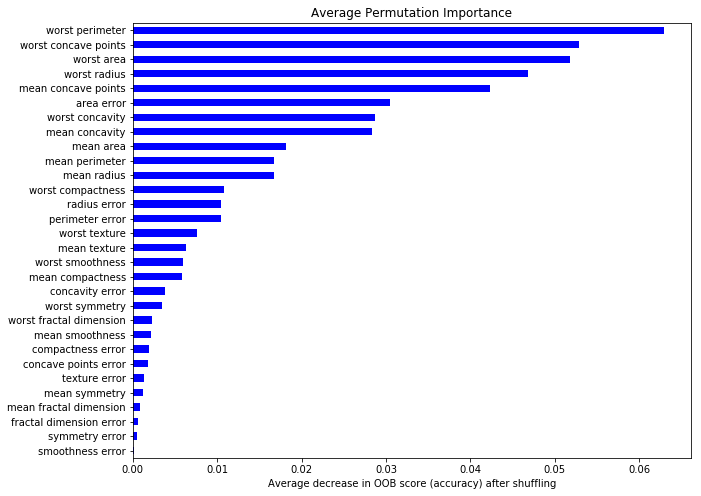

In [70]:
my_feat_importance = my_oob_permutation_importance(myrf, X_train, y_train)

importance_series = pd.Series(data=my_feat_importance, index=feature_names)
ax = importance_series.sort_values().plot(kind='barh', 
                                          figsize=(10,8),
                                          color='b')
ax.set_title('Average Permutation Importance')
ax.set_xlabel('Average decrease in OOB score (accuracy) after shuffling');

### Warning: "feature importance" is a misleading name.
It gets tremendously overinterpreted. See this article about how to treat these values:
http://explained.ai/rf-importance/index.html

Also, "feature importance" tells us nothing about the directional relationship with the target. For that, let's turn to "partial dependence".

# Partial Dependence plots

http://scikit-learn.org/stable/modules/ensemble.html#partial-dependence

Here's a rough overview of how to calculate the _partial dependence_ of the model $\hat{y} = \hat{f}(\vec{x})$ on a particular feature $k$.

- (assume you've already fit a model $\hat{f}(\vec{x})$ on a data set $X$)
- replace column $k$ of the data with a value $z$. Let's call a point modified in this way $\vec{x}'$
- use your model to predict on this modified data: $\hat{f}(\vec{x_i}')$ for all $i$
- take the average of these predictions (the raw predictions for regression, or the log of the odds using the predicted probability for classification). This is the partial dependence of $\hat{y}$ on feature $k$ evaluated at $z$. Let's call this function $\text{PDP}(z)$
  - $\text{PDP}(z) = \frac{1}{n}\sum_i^n \hat{f}(\vec{x_i}'; x_{ik}=z)$
- plot $\text{PDP}(z)$ as $z$ ranges over the observed values of $X_k$


### Classification example: breast cancer data

In [71]:
# Load data
data = load_breast_cancer()
X = data.data
y = data.target

feature_names = data.feature_names

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0)

In [72]:
model = RandomForestClassifier(n_estimators=50,
                           max_features='auto',
                           random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

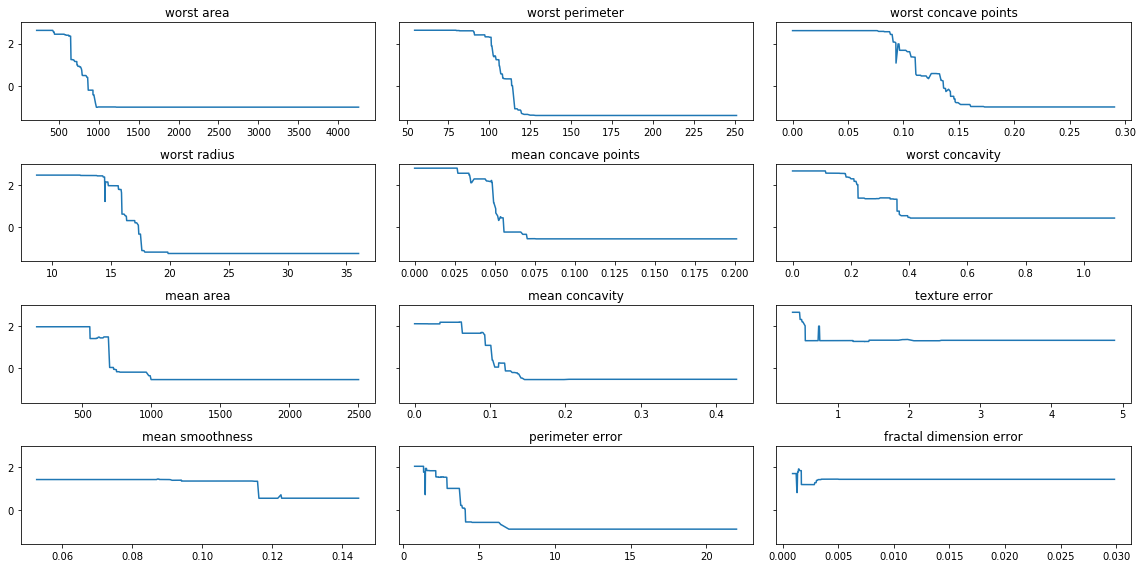

In [73]:
feature_indices = [23, 22, 27, 20, 7, 26, 3, 6, 11, 4, 12, 19]

fig, axes = plt.subplots(4,3, figsize=(16,8), sharey=True)

for ax, feat_ind in zip(axes.flatten(), feature_indices):
    xx, pdp = partial_dependence(model, X_train, feat_ind)
    ax.plot(xx, pdp)
    ax.set_title(feature_names[feat_ind])
plt.tight_layout()

### Regression example: boston housing prices

In [75]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_X, boston_y, boston_names = boston['data'], boston['target'], boston['feature_names']

b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(boston_X, boston_y, test_size=0.25, random_state=1)

In [79]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=50,
                           max_features='auto',
                           random_state=0)
model2.fit(b_X_train, b_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

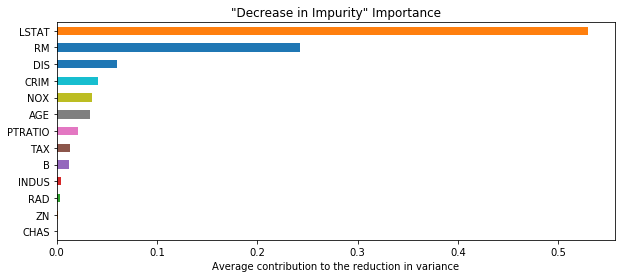

In [80]:
# Plot the feature importance
b_feat_scores = pd.Series(model2.feature_importances_,
                           index=boston_names)
b_feat_scores = b_feat_scores.sort_values()
ax = b_feat_scores.plot(kind='barh', figsize=(10,4))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
neg_mse = lambda y1, y2: -mean_squared_error(y1, y2)

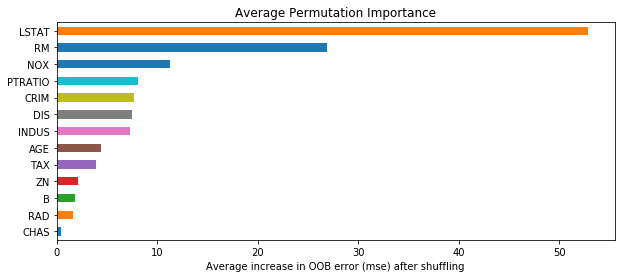

In [83]:
model3 = MyRandomForestRegressor(n_trees=200)
model3.fit(b_X_train, b_y_train)
perm_feat_imp = my_oob_permutation_importance(model3, b_X_train, b_y_train, scorer=neg_mse)

perm_importance_series = pd.Series(data=perm_feat_imp, index=boston_names)
ax = perm_importance_series.sort_values().plot(kind='barh', figsize=(10,4))
ax.set_title('Average Permutation Importance')
ax.set_xlabel('Average increase in OOB error (mse) after shuffling');

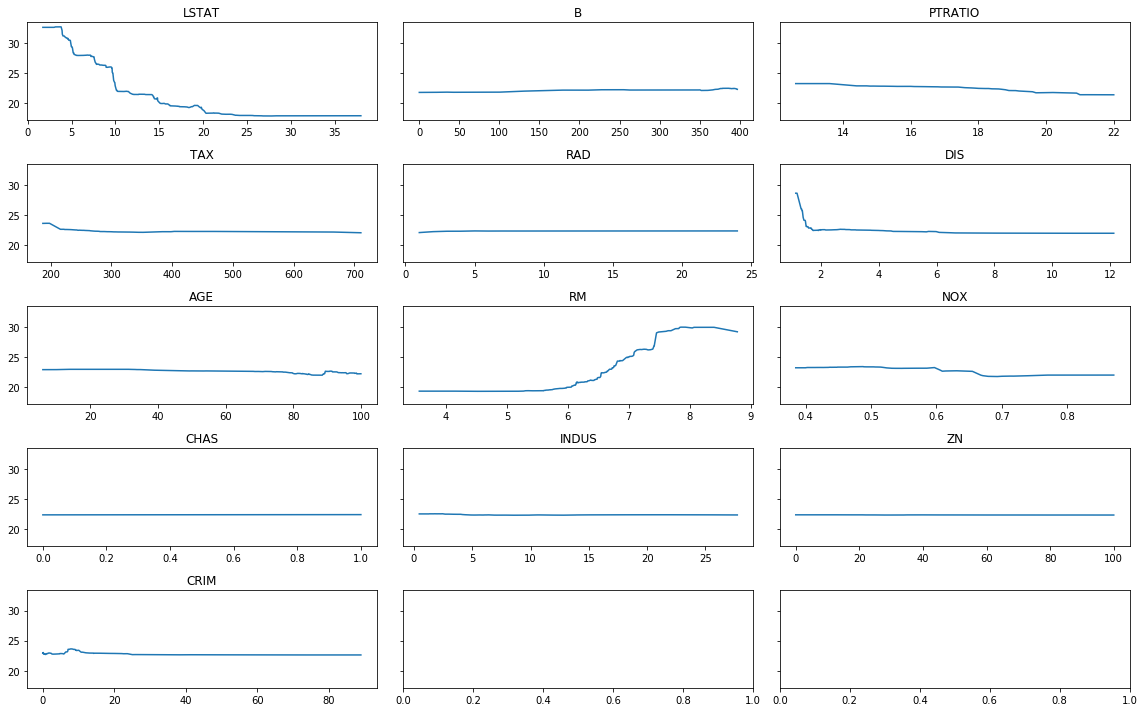

In [84]:
fig, axes = plt.subplots(5,3, figsize=(16,10), sharey=True)

for ax, feat_ind in zip(axes.flatten(), reversed(range(boston_X.shape[1]))):
    xx, pdp = partial_dependence(model2, b_X_train, feat_ind, classification=False)
    ax.plot(xx, pdp)
    ax.set_title(boston_names[feat_ind])
plt.tight_layout()

In [85]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
xx1, xx2, pdp2d = partial_dependence_2d(model2, b_X_train, 5, 12, classification=False)

In [54]:
xx1.shape

(344, 348)

In [55]:
xx2.shape

(344, 348)

In [56]:
pdp2d.shape

(344, 348)

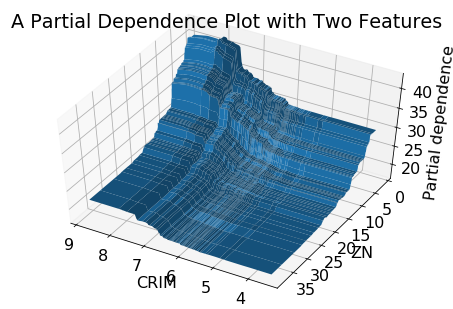

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx1, xx2, pdp2d)
ax.view_init(elev=50, azim=120)
ax.set_xlabel(boston_names[0])
ax.set_ylabel(boston_names[1])
ax.set_zlabel('Partial dependence')
ax.set_title("A Partial Dependence Plot with Two Features");